# Python w badaniach humanistycznych
## Zajęcia 3

Dziś trochę zwalniamy.

Zaczniemy od zaciągnięcia materiałów z GitHuba, ale tym razem bez GUI.

Jeśli ktoś ma skonfigurowany `upstream` z poprzednich zajęć, pomija punkt (1).

(0a) Linuksowcy/Macowcy przechodzą terminalem do katalogu, w którym sklonowaliśmy materiały do zajęć (repozytorium o nazwie `kurs-pythona-2017Z-<login-githubowy>`) - `cd ~/tutaj/mam/ten/katalog/kurs-pythona-2017Z-piotrkasprzyk`.

(0b) Windowsowcy uruchamiają Git Bash, a potem przechodzą tamże - `cd /c/Users/ja/Pulpit/kurs-pythona-2017Z-piotrkasprzyk`.

(1) `git remote add upstream https://github.com/LaCH-UW/kurs-pythona-2017Z.git`

(2) `git fetch upstream`

(3) `git checkout master`

(4) `git stash`

(5) `git merge upstream/master`

(6) `git stash pop`

Powinniśmy wzbogacić się o pliki `2017-12-05/zajecia.ipynb` (ćwiczenia na zajęciach) i `2017-12-05/slajdy.ipynb` (materiały z wykładu).

## Korzystanie z zasobów internetowych - część I

Polecenie get z moduły requests pozwala na wykonywanie requestu HTTP GET (i w efekcie zaciąganie plików udostępnionych jako "strony internetowe".

In [1]:
import requests  # moduł requests nie jest wbudowany w instalację pythona, ale powinniśmy go dostać razem z jupyter notebook w ramach anacondy

result = requests.get('https://wolnelektury.pl/media/book/txt/lalka-tom-drugi.txt')
print(result.status_code)  # 200 oznacza sukces, 4** oznacza błędny request (nasza wina), 5** oznacza błąd serwera (często nie nasza wina)
tekst = result.text

tekst[:100]

200


'Bolesław Prus\r\n\r\nLalka\r\n\r\nISBN 978-83-288-2672-4\r\n\r\n\r\n\r\n\r\n\r\nTom II\r\n\r\n\r\n\r\nI. Pamiętnik starego subie'

## Ćwiczenie 1: Zapiszmy na dysku drugi tom Lalki
(najlepiej koło pierwszego, na ścieżce `../dane/lalka-tom-drugi.txt`)

## Ćwiczenie 2: Policzmy słowa w drugim tomie Lalki
(pamiętajmy o sposobach czyszczenia tekstu z poprzednich zajęć)

In [2]:
import unicodedata

def get_word_map(tekst):
    struct = {}
    for word in ''.join(c for c in tekst if not unicodedata.category(c).startswith('P')).upper().split():
        if word not in struct:
            struct[word] = 1
        else:
            struct[word] += 1
    return struct

## Ćwiczenie 3: Policzmy unikalne słowa w drugim tomie Lalki

## Ćwiczenie 4: Zobaczmy, czy jakieś słowa w drugim tomie Lalki są anagramami

## Ćwiczenie 5: Policzmy zdania w drugim tomie Lalki
(naiwnie, "od kropki/znaku zapytania/wykrzyknika do kropki/znaku zapytania/wykrzyknika")

## Część "jak korzystać z bibliotek" - NLTK.

In [3]:
import nltk  # sytuacja jak z reequests - powinnismy mieć nltk z anacondy
nltk.download('punkt')  # przed pierwszym użyciem musimy ściągnąć paczkę z tokenizerami

from nltk.tokenize import sent_tokenize, word_tokenize

s = sent_tokenize(tekst, language='polish')
s[:10]

[nltk_data] Downloading package punkt to /home/piotr/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Bolesław Prus\r\n\r\nLalka\r\n\r\nISBN 978-83-288-2672-4\r\n\r\n\r\n\r\n\r\n\r\nTom II\r\n\r\n\r\n\r\nI.',
 'Pamiętnik starego subiekta\r\n\r\nSytuacja polityczna jest tak niepewna, że wcale by mnie nie zdziwiło, gdyby około grudnia wybuchła wojna.',
 'Ludziom ciągle się zdaje, że wojna może być tylko na wiosnę; widać zapomnieli, że wojny: pruska i francuska, rozpoczynały się w lecie.',
 'Nie rozumiem zaś, skąd wyrósł przesąd przeciw kampaniom zimowym?… W zimie stodoły są pełne, a droga jak mur; tymczasem na wiosnę u chłopa jest przednówek, a drogi jak ciasto; przejedzie bateria i możesz się w tym miejscu kąpać.',
 'Lecz z drugiej strony — zimowe noce, które ciągną się po kilkanaście godzin, potrzeba ciepłej odzieży i mieszkań dla wojska, tyfus… Doprawdy, nieraz dziękuję Bogu, że mnie nie stworzył Moltkem; on musi kręcić głową, nieborak!…\r\n\r\nAustriacy, a raczej Węgrzy już na dobre wleźli do Bośni i Hercegowiny, gdzie ich bardzo niegościnnie przyjmują.',
 'Znalazł się nawet jakiś 

In [4]:
import nltk
nltk.download('punkt')  # teraz to jest już niepotrzebne, ale nie zaszkodzi

from nltk.tokenize import word_tokenize

w = word_tokenize(tekst, language='polish')
w[:20]

[nltk_data] Downloading package punkt to /home/piotr/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Bolesław',
 'Prus',
 'Lalka',
 'ISBN',
 '978-83-288-2672-4',
 'Tom',
 'II',
 'I',
 '.',
 'Pamiętnik',
 'starego',
 'subiekta',
 'Sytuacja',
 'polityczna',
 'jest',
 'tak',
 'niepewna',
 ',',
 'że',
 'wcale']

## Ćwiczenie 6: Wykonajmy ćwiczenia 2, 3 i 5 za pomoca NLTK. Porównajmy różnice.

## Korzystanie z zasobów internetowych - część II

W poprzednim przykładzie dostaliśmy surowy plik tekstowy -- to w rzeczywistym świecie bardzo rzadki przypadek.

Często będziemy mieć do czynienia z danymi w formacie XML lub JSON (jeśli mamy szczęście i są ustrukturyzowane) lub HTML (jeśli mamy mniej szczęścia).

In [5]:
import requests

r = requests.get('https://api.github.com/users/{user}'.format(user='piotrkasprzyk'))
j_data = r.json()

j_data

{'avatar_url': 'https://avatars1.githubusercontent.com/u/14312755?v=4',
 'bio': None,
 'blog': '',
 'company': None,
 'created_at': '2015-09-16T12:39:53Z',
 'email': None,
 'events_url': 'https://api.github.com/users/piotrkasprzyk/events{/privacy}',
 'followers': 0,
 'followers_url': 'https://api.github.com/users/piotrkasprzyk/followers',
 'following': 0,
 'following_url': 'https://api.github.com/users/piotrkasprzyk/following{/other_user}',
 'gists_url': 'https://api.github.com/users/piotrkasprzyk/gists{/gist_id}',
 'gravatar_id': '',
 'hireable': None,
 'html_url': 'https://github.com/piotrkasprzyk',
 'id': 14312755,
 'location': None,
 'login': 'piotrkasprzyk',
 'name': 'Piotr Kasprzyk',
 'organizations_url': 'https://api.github.com/users/piotrkasprzyk/orgs',
 'public_gists': 0,
 'public_repos': 6,
 'received_events_url': 'https://api.github.com/users/piotrkasprzyk/received_events',
 'repos_url': 'https://api.github.com/users/piotrkasprzyk/repos',
 'site_admin': False,
 'starred_url'

In [6]:
# Jak "widać" JSON rozparsował się do zwykłego słownika (`dict`)
print(j_data['name'])
print(j_data['url'])
print(j_data['avatar_url'])

# Ostatnie jest linkiem do obrazka - avatara. Jego też możemy ściągnąć i wyświetlić.

Piotr Kasprzyk
https://api.github.com/users/piotrkasprzyk
https://avatars1.githubusercontent.com/u/14312755?v=4


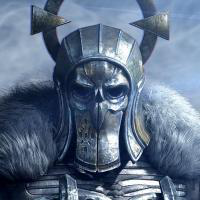

In [7]:
from PIL import Image  # ta linijka wymaga biblioteki pillow, która również powinna przyjść z anacondą
from io import BytesIO  # a to jest biblioteka standardowa

avatar_url = j_data['avatar_url']
r = requests.get(avatar_url)
i = Image.open(BytesIO(r.content))

i

## Ćwiczenie 7: Wyświetl swój avatar GitHubowy.
( dla zainteresowanych: avatar == "zdjęcie profilowe", można zmienić w https://github.com/settings/profile )

## Inny przykład: mojepanstwo.pl

https://mojepanstwo.pl/api/

In [8]:
r = requests.get('https://api-v3.mojepanstwo.pl/dane/krs_formy_prawne.json')

json_data = r.json()

json_data

{'Count': 50,
 'Dataobject': [{'data': {'krs_formy_prawne.id': '48',
    'krs_formy_prawne.nazwa': 'SPÓŁDZIELCZA KASA OSZCZĘDNOŚCIOWO-KREDYTOWA',
    'krs_formy_prawne.typ_id': '1'},
   'dataset': 'krs_formy_prawne',
   'global_id': '43906579',
   'id': '48',
   'mp_url': 'https://mojepanstwo.pl/dane/krs_formy_prawne/48',
   'schema_url': 'https://api-v3.mojepanstwo.pl/schemas/dane/krs_formy_prawne.json',
   'score': None,
   'slug': 'spoldzielcza-kasa-oszczednosciowo-kredytowa',
   'url': 'https://api-v3.mojepanstwo.pl/dane/krs_formy_prawne/48'},
  {'data': {'krs_formy_prawne.id': '43',
    'krs_formy_prawne.nazwa': 'ZWIĄZEK RZEMIOSŁA POLSKIEGO',
    'krs_formy_prawne.typ_id': '2'},
   'dataset': 'krs_formy_prawne',
   'global_id': '43906611',
   'id': '43',
   'mp_url': 'https://mojepanstwo.pl/dane/krs_formy_prawne/43',
   'schema_url': 'https://api-v3.mojepanstwo.pl/schemas/dane/krs_formy_prawne.json',
   'score': None,
   'slug': 'zwiazek-rzemiosla-polskiego',
   'url': 'https://ap

## Ćwiczenie 8: Znajdź identyfikator formy prawnej "kółko rolnicze" w bazie mojepanstwo.pl
( pomocny link: https://api-v3.mojepanstwo.pl/dane/krs_formy_prawne.json )

## Ćwiczenie 9: Ustal, ile jest kółek rolniczych w bazie mojepanstwo.pl
( pomocny link: https://api-v3.mojepanstwo.pl/dane/krs_podmioty.json?conditions[krs_podmioty.forma_prawna_id]={id-formy-prawnej} )

## Następne zajęcia: 19 grudnia 2017, 16:30
### Dziś nie ma nowej pracy domowej. Proszę natomiast, żeby wszyscy zrobili zaległe prace domowe (także "dla ambitnych").
Proszę o wrzucenie ich do swojego repozytorium do 16 grudnia 2017 (sobota), do godziny 23:59.